** Esta seção contempla noções básicas de Machine Learning com Scikit-Learn**

Referência: [http://scikit-learn.org/](http://scikit-learn.org/)

![scikit-learn](../images/scikit-learn.png)

(screeshot retirado em 10/2016)

![steps](../images/steps.png)

### Objetivos da Seção

Ao final desta seção, você deve estar familiarizado com conceitos básicos de *Machine Learning* utilizando *Scikit-Learn*. Tais conceitos contemplam:
* Definir Machine Learning
* Como começar a trabalhar com dados usando Scikit-Learn
* Introduzir a API Scikit-Learn


### Afinal, o que é Machine Learning?

![mindmap](../images/mindmap.png)

Algoritmos de Machine Learning procuram **ajustar parâmetros** de maneira **generalizada**, baseando-se no comportamento de **dados já existente**.

A seguir, serão exemplificados 2 problemas mais comuns em Machine Learning.


### Exemplo 1: Classificação

Dado um conjunto **bi-dimensional**, onde as cores representam diferentes classes, um problema de *Classificação* pode ser utilizado para separar essas classes.

In [1]:
%matplotlib inline

# http://seaborn.pydata.org/
# Instanciaremos o seaborn com o seus parâmetros padrões.
import seaborn; seaborn.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(
    n_samples=50,
    centers=2,
    random_state=0,
    cluster_std=0.60
)

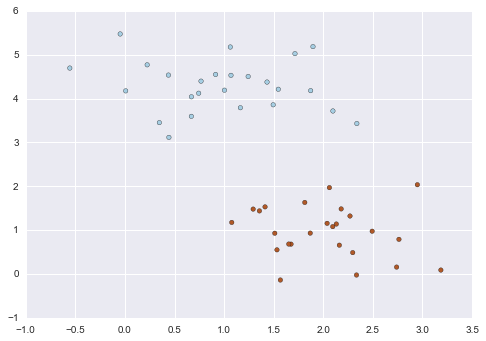

In [3]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [4]:
# Stochastic Gradient Descent
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01,n_iter=200, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

(-1.3, 5.2999999999999998, -1.3240404974342852, 5.804850446119989)

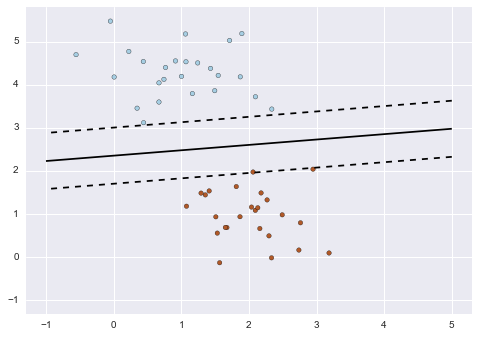

In [5]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function(np.array([[x1, x2]]))
    Z[i, j] = p[0]

levels = [-1.0, 0.0, 1.0]
colors = 'k'
linestyles = ['dashed', 'solid', 'dashed']
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

ax.axis('tight')

Esta parece ser uma tarefa trivial, mas existe aqui um conceito importante.

Quando desenhamos esta linha que separa as cores, nós temos um modelo que generaliza para novos dados. Se nós posicionarmos um novo ponto, sem saber qual a cor, apenas pela posição saberíamos classificar entre vermelho ou azul.

In [6]:
# Para executar os passos anteriores com apenas um comando,
# basta retirar os comentários das próximas duas linhas.
#from fig_code import plot_sgd_separator
#plot_sgd_separator()

In [7]:
## Para visualizar o código que gera o gráfico anterior, 
## apenas retire o caracter '#' da próxima linha e execute esta célula
# %load fig_code/sgd_separator.py

### Exemplo 2: Regressão

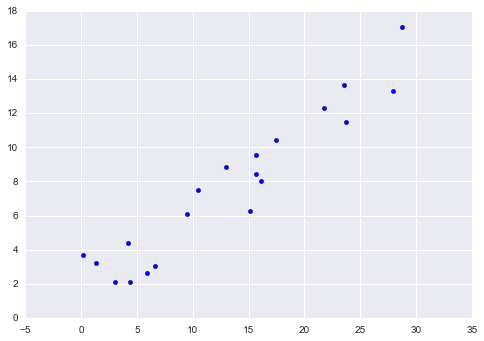

In [8]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

ax = plt.axes()
ax.scatter(x, y)

In [9]:
from sklearn.linear_model import LinearRegression
# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(-1.5, 31.5, 0.6745707711982486, 17.871481843279266)

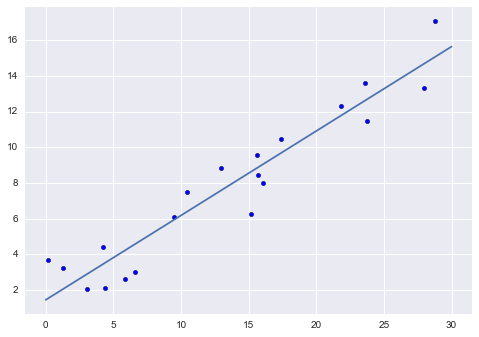

In [10]:
# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])

ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.axis('tight')

In [11]:
# Para executar os passos anteriores com apenas um comando,
# basta retirar os comentários das próximas duas linhas.
#from fig_code import plot_linear_regression
#plot_linear_regression()

### Representando dados com Scikit-Learn

Machine Learning está relacionado com criação de modelos a partir de um conjunto de dados.

Por isso, vamos começar a entender como os dados são representados pelo Scikit-Learn antes de efetivamente treinarmos modelos.

A maior parte dos algoritmos implementados em Scikit-Learn esperam que os dados estejam armazenados em *arrays* (numpy) ou matrizes (scipy.sparse). É importante entender a dimensão desses objectos [n_sample, n_features].


* **n_samples**: número de amostras. Uma amostra pode ser um documento, uma imagem, um vídeo, uma música, uma linha de uma tabela ou de um arquivo CSV.
* **n_feature**: número de atributos que descrevem cada item, de maneira quantitativa. Números reais podem representar uma *feature*, bem como *booleans* e valores discretos, em alguns casos.

O número de atributos deve ser pré-fixado. Mas, podemos ter problemas de alta dimensão.

### O conjunto de dados Iris

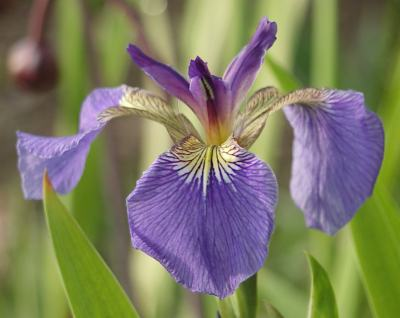

Iris Setosa



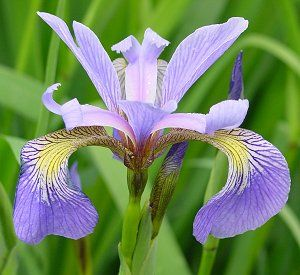

Iris Versicolor



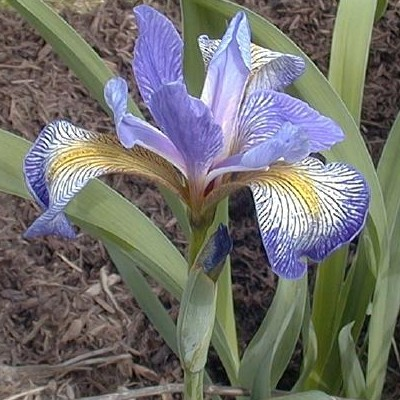

Iris Virginica


In [12]:
from IPython.core.display import Image, display
display(Image(filename='../images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='../images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='../images/iris_virginica.jpg'))
print("Iris Virginica")

![irisdataset](../images/irisdataset.png)

In [13]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=700, height=1000)

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()
type(iris)
# Conjunto de dados carregados consiste em um objeto diferente: 'bunch'

sklearn.datasets.base.Bunch

In [16]:
# Propriedade feature_names acessa... atributos (features)
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
# Propriedade data acessa... matriz de amostras (sample, example, instance, record)
print (iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [18]:
# Propriedade target_names acessa... nome das classes
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [19]:
# Propriedade target acessa... vetor de alvos/respostas
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


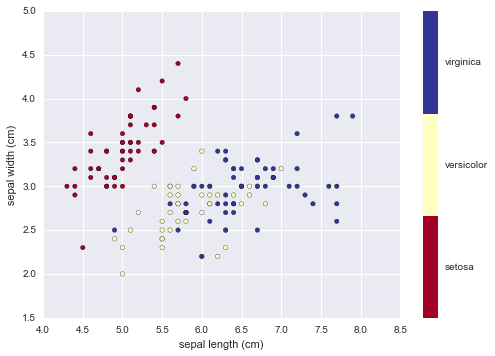

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# formatter vai plotar uma barra de cores indicando as classes
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(
    iris.data[:, x_index],
    iris.data[:, y_index],
    c=iris.target,
    cmap=plt.cm.get_cmap('RdYlBu', 3)
)

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

** Exercício relâmpago **: Altere os números de *x_index* e de *y_index*, variando de 0 a 3.

In [23]:
from sklearn import datasets

In [24]:
# Remova o '#' da linha abaixo e digite <TAB> para investigar todas as possibilidades
#datasets.fetch_
#datasets.load_